# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#### Analysis of portfolio

In [192]:
portfolio

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [3]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [4]:
#offer type and offer opening time(in days)
pd.crosstab(portfolio['offer_type'],portfolio['duration'],margins=True)

duration,3,4,5,7,10,All
offer_type,,,,,,
bogo,0,0,2,2,0,4
discount,0,0,0,2,2,4
informational,1,1,0,0,0,2
All,1,1,2,4,2,10


In [5]:
#minimum required spend and reward
portfolio.pivot_table(index='offer_type',values=['duration','difficulty','reward'],aggfunc=np.mean)
# pd.crosstab(portfolio['difficulty'],portfolio['reward'],margins=True)

,difficulty,duration,reward
offer_type,,,
bogo,7.50,6.0,7.5
discount,11.75,8.5,3.0
informational,0.00,3.5,0.0


## Analysis of profile

In [6]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


M          8484
F          6129
Unknown    2175
O           212
Name: gender, dtype: int64


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

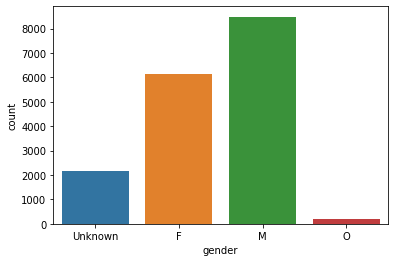

In [7]:
#gender
profile['gender'].fillna('Unknown', inplace=True)
print(profile['gender'].value_counts())

sns.countplot(profile['gender'])

<AxesSubplot:xlabel='became_member_on', ylabel='Count'>

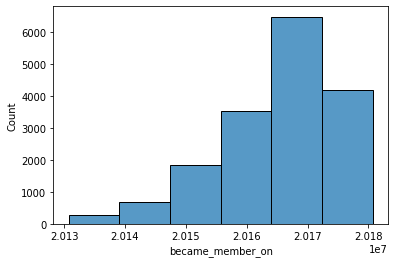

In [450]:
sns.histplot(profile['became_member_on'],bins=6)

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

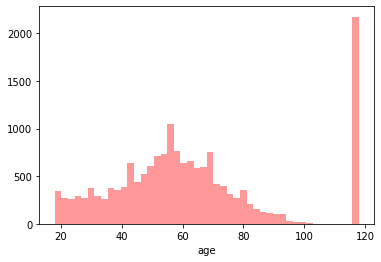

In [9]:
sns.distplot(profile['age'],kde=False,color='red')

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

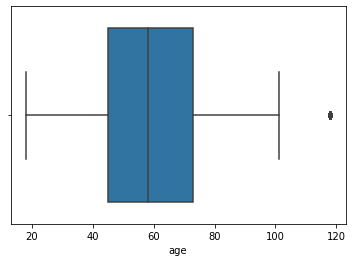

In [10]:
sns.boxplot(profile['age'])

In [447]:
len(profile[profile['age']==118])/17000*100

12.794117647058822

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income'>

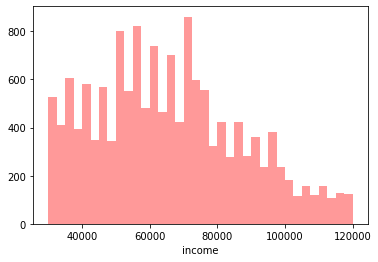

In [11]:
sns.distplot(profile['income'],kde=False,color='red')

In [12]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [13]:
profile[(profile['age']==118)]['id'].value_counts()

ed652dee45c042cc99eb591f2f210b65    1
3dad85aa966e43e8ab04f01332a748e8    1
8c20d3c8e4ef4ad997923937a2637851    1
af9560ee481a406381c58c9f7b79cc2b    1
12779c18e3ff4c42ba1f30973d9d4009    1
                                   ..
9dcaa45110564728b0e43b053c5644f6    1
8d041a344de14de1af61420f32387931    1
5a8dadc611394cd1af9692424b090824    1
649b354e168c4a0a9dfaad9770f97f29    1
f9774a27b8784133a7afbb234d4fb08f    1
Name: id, Length: 2175, dtype: int64

In [14]:
len(transcript['person'].unique())

17000

In [227]:
profile[['age','income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


## Analysis of transcript

In [15]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [16]:
transcript = transcript.assign(offer_id=np.nan, amount=np.nan,reward_recv=np.nan)

In [17]:
# to split the data in value column into amount, offer id and reward and dropping the value column
transcript['amount'] = transcript['value'].apply(lambda x : x['amount'] if x.get("amount") else np.nan)
transcript['offer_id'] = transcript['value'].apply(lambda x: list(x.values())[0] if "offer_id" in list(x.keys()) or "offer id" in list(x.keys()) else np.nan)
transcript['reward_recv'] = transcript['value'].apply(lambda x: x['reward'] if x.get("reward") else np.nan)
transcript.drop('value',inplace=True,axis=1)

In [18]:
## combining profile and transcript
#for this renaming the person column in transcript to id first and merging them

In [19]:
transcript = transcript.rename(columns={"person":"id"})
portfolio = portfolio.rename(columns={"id":"offer_id"})
pro_trans = pd.merge(transcript,profile,on=["id"],how="left")
df = pd.merge(pro_trans,portfolio,on=['offer_id'],how="left")

In [20]:
df

,id,event,time,offer_id,amount,reward_recv,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,20170509,100000.0,5.0,"[web, email, mobile]",5.0,7.0,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,Unknown,118,20170804,NaN,5.0,"[web, email]",20.0,10.0,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,M,68,20180426,70000.0,2.0,"[web, email, mobile]",10.0,7.0,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,Unknown,118,20170925,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,Unknown,118,20171002,NaN,10.0,"[web, email, mobile, social]",10.0,5.0,bogo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,NaN,M,66,20180101,47000.0,NaN,NaN,NaN,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,NaN,M,52,20180408,62000.0,NaN,NaN,NaN,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,NaN,F,63,20130922,52000.0,NaN,NaN,NaN,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,NaN,M,57,20160709,40000.0,NaN,NaN,NaN,NaN,NaN


In [21]:
categorical = ['offer_type','gender','reward','reward_recv']

<AxesSubplot:xlabel='reward_recv', ylabel='count'>

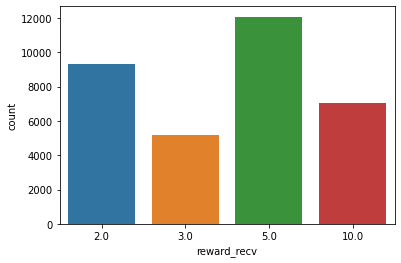

In [22]:
sns.countplot(x='reward_recv',data=df)

<AxesSubplot:xlabel='reward', ylabel='count'>

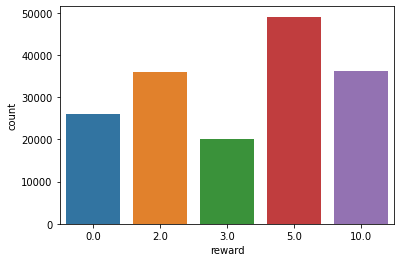

In [23]:
sns.countplot(x='reward',data=df)

<AxesSubplot:xlabel='event', ylabel='count'>

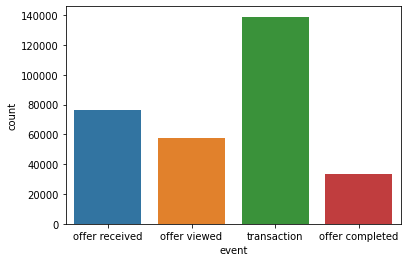

In [24]:
sns.countplot(x='event',data=df)

In [25]:
len(df[df['event']=="transaction"]['id'].unique())

16578

In [26]:
len(df[df['event']!="transaction"]['id'].unique())

16994

In [27]:
df['id'].value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
5e60c6aa3b834e44b822ea43a3efea26    48
d0a80415b84c4df4908b8403b19765e3    48
79d9d4f86aca4bed9290350fb43817c2    48
                                    ..
cae5e211053f4121a389a7da4d631f7f     2
22617705eec442e0b7b43e5c5f56fb17     2
fccc9279ba56411f80ffe8ce7e0935cd     2
912b9f623b9e4b4eb99b6dc919f09a93     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: id, Length: 17000, dtype: int64

In [28]:
df[df['id']=="7ecfc592171f4844bdc05bdbb48d3847"]

,id,event,time,offer_id,amount,reward_recv,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
121670,7ecfc592171f4844bdc05bdbb48d3847,offer received,336,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,Unknown,118,20180301,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational
126662,7ecfc592171f4844bdc05bdbb48d3847,offer viewed,336,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,Unknown,118,20180301,NaN,0.0,"[email, mobile, social]",0.0,3.0,informational


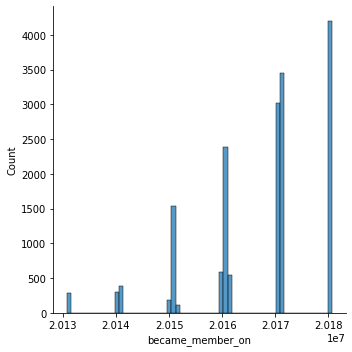

In [29]:
sns.displot(profile['became_member_on'])

In [30]:
import matplotlib.pyplot as plt

### Offer Analysis

### offer receiving vs offer completion

Offer receving Vs offer Completion


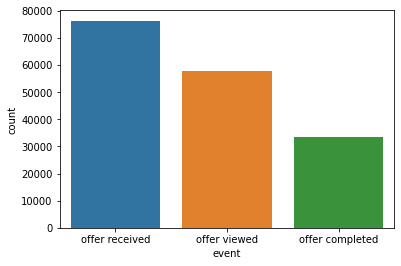

offer viewed       75.678121
offer completed    44.022445
Name: event, dtype: float64


In [31]:
df_1 = df[(df['event']=="offer received")| (df['event']=="offer viewed") | (df['event']=="offer completed")]
print("Offer receving Vs offer Completion")
sns.countplot(x='event',data=df_1)
plt.show()
print(df_1[(df_1['event']=="offer viewed") | (df_1['event']=="offer completed")]['event'].value_counts()/len(df_1[df_1['event']=="offer received"])*100)


### offer receiving vs offer completion(w.r.t offer types)

offer receiving vs offer completion(w.r.t offer types)


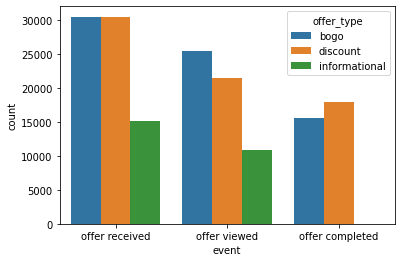

-----BOGO-----
offer viewed       83.442080
offer completed    51.375455
Name: event, dtype: float64


-----discount-----
offer viewed       70.212487
offer completed    58.638641
Name: event, dtype: float64


-----informational-----
offer viewed    71.092878
Name: event, dtype: float64


In [32]:
print("offer receiving vs offer completion(w.r.t offer types)")
sns.countplot(x='event',hue="offer_type",data=df_1)
plt.show()

print("-----BOGO-----")
print(df_1[((df_1['event']=="offer viewed") | (df_1['event']=="offer completed"))&(df_1['offer_type']=="bogo")]['event'].value_counts()/len(df_1[(df_1['event']=="offer received")&(df_1['offer_type']=="bogo")])*100)
print("\n")
print("-----discount-----")
print(df_1[((df_1['event']=="offer viewed") | (df_1['event']=="offer completed"))&(df_1['offer_type']=="discount")]['event'].value_counts()/len(df_1[(df_1['event']=="offer received")&(df_1['offer_type']=="discount")])*100)
print("\n")
print("-----informational-----")
print(df_1[((df_1['event']=="offer viewed") | (df_1['event']=="offer completed"))&(df_1['offer_type']=="informational")]['event'].value_counts()/len(df_1[(df_1['event']=="offer received")&(df_1['offer_type']=="informational")])*100)

In [33]:
df[(df['reward_recv'].notnull()) & (df['reward']!=df['reward_recv'])]

,id,event,time,offer_id,amount,reward_recv,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type


## Customer Behaviour

## customers without receving an offer but making a transaction analysis

In [34]:
#logic for finding 
#list of people id's receiivng the offer
#df of people not receiving an offer
#comparing to get only those ids from df which are not present in list

ids1 = df[(df['event']!="transaction")]['id']

noffer_id_df = df[df['id'].isin(df[(df['event']=="transaction") & (~df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]

noffer_id_df = noffer_id_df[['id','amount','gender','age','became_member_on','income']]
noffer_id_df.groupby('id').agg({'amount': 'sum','gender':'first','became_member_on':'first','income':'first','id':'count','age':'first'})


,amount,gender,became_member_on,income,id,age
id,,,,,,
12ede229379747bd8d74ccdc20097ca3,63.25,M,20151005,70000.0,3,91
3a4874d8f0ef42b9a1b72294902afea9,67.62,F,20160816,88000.0,3,55
ae8111e7e8cd4b60a8d35c42c1110555,86.43,F,20170106,72000.0,5,54
c6e579c6821c41d1a7a6a9cf936e91bb,6.95,F,20171014,35000.0,4,72
da7a7c0dcfcb41a8acc7864a53cf60fb,0.35,Unknown,20170801,NaN,1,118
eb540099db834cf59001f83a4561aef3,26.01,F,20170929,34000.0,4,66


## list of customers receving an offer and completing it everytime (so it's like we can send offer to these group of customers for sure)

In [35]:
ids1 = df[df['event']=="offer received"]['id']
offer_complete = df[df['id'].isin(df[(df['event']=="offer completed") & (df['offer_type']!="informational") & (df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]
from tqdm import tqdm
offer_complete['offerComplete'] = np.NaN
for i in tqdm(offer_complete['id'].unique()):
    val = "yes" if (offer_complete[offer_complete['id']==i]['event'].value_counts()['offer received'] == offer_complete[offer_complete['id']==i]['event'].value_counts()['offer completed']) else "no"
    offer_complete.loc[offer_complete['id'] == i, 'offerComplete'] = val


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
  0%|                                                                                        | 0/12774 [00:00<?, ?it/s]C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
100%|███████████████████████████████████████████

In [50]:
print("People completing the offer for sure everytime",len((offer_complete[offer_complete['offerComplete']=="yes"]).drop_duplicates(subset=['id'],keep="first")))
      
print("People completing the offer atleast once",len((offer_complete[offer_complete['offerComplete']=="no"]).drop_duplicates(subset=['id'],keep="first")))

People completing the offer for sure everytime 1916
People completing the offer atleast once 10858


In [52]:
## Analysis of customers completing the offer everytime
offer_compyes = offer_complete[offer_complete['offerComplete']=="yes"]
offer_compyes = offer_compyes[['id','amount','gender','age','became_member_on','income']]
offer_compyes = offer_compyes.groupby('id').agg({'amount': 'sum','gender':'first','became_member_on':'first','income':'first','id':'count','age':'first'})

offer_compyes

,amount,gender,became_member_on,income,id,age
id,,,,,,
004c5799adbf42868b9cff0396190900,347.38,M,20160331,99000.0,26,54
00b3c376db2a4115af3aef34a02f61d6,219.63,M,20170627,104000.0,16,50
00bc42a62f884b41a13cc595856cf7c3,150.64,M,20160111,72000.0,22,44
00c20a9202d5475190b31a24de6fb06d,164.01,O,20160306,80000.0,20,52
00d7c95f793a4212af44e632fdc1e431,162.42,M,20161229,75000.0,20,71
...,...,...,...,...,...,...
ff9f73ead16a4f9b9e1a53a27280af92,263.30,F,20150731,67000.0,26,43
ffd53e5ba61d41378b66efc00d9f9682,89.44,M,20170216,32000.0,24,40
ffdefcac307f4ca99ac1ebd51470f106,101.32,F,20170315,47000.0,20,87


-----Gender Analysis---


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


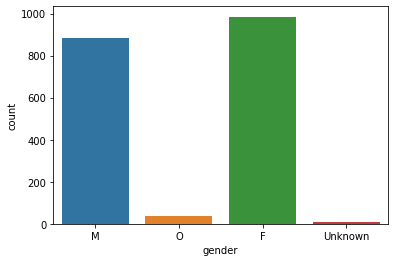

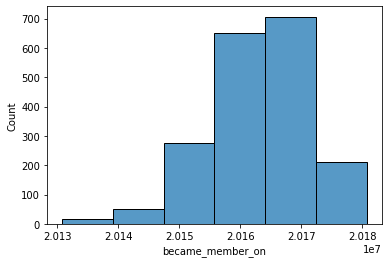

In [38]:
print("-----Gender Analysis---")
sns.countplot(offer_compyes['gender'])
plt.show()
sns.histplot(offer_compyes['became_member_on'],bins=6)
plt.show()


In [53]:
offer_compyes[['amount','age','income','id']].describe()

,amount,age,income,id
count,1916.000000,1916.000000,1909.000000,1916.000000
mean,212.549410,56.591336,71740.701938,22.161795
std,156.124025,16.853957,20494.063254,6.329831
min,11.620000,18.000000,30000.000000,5.000000
25%,130.117500,46.000000,56000.000000,18.000000
50%,180.630000,57.000000,71000.000000,22.000000
75%,246.567500,67.000000,87000.000000,26.000000
max,1608.690000,118.000000,120000.000000,48.000000


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


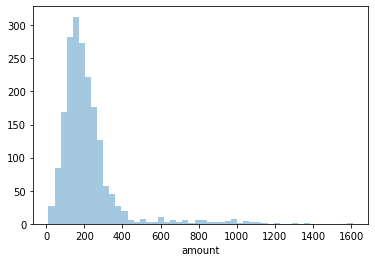

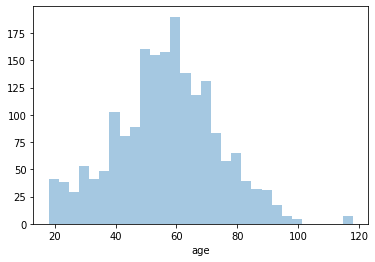

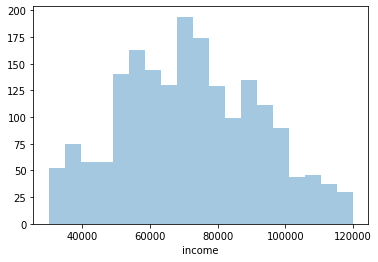

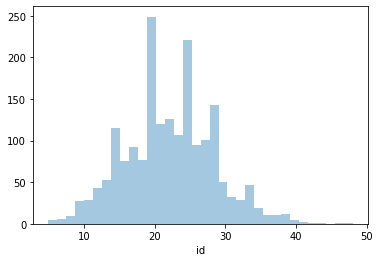

In [55]:
for i in ['amount','age','income','id']:
    sns.distplot(offer_compyes[i],kde=False)
    plt.show()

In [41]:
(1916/17000)*100

11.270588235294117

## customers receving an offer & never completing it but making a transaction

#### to these set of customers it is not required to send an offer at all

In [85]:
ids1 = df[df['event']=="offer completed"]['id']

ids2 = df[df['event']=='transaction']['id']

offer_incompTrs = df[df['id'].isin(df[(df['event']=="offer received") & (df['id'].isin(ids2)) &(~df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]

# offer_incompTrs

offer_incompTrs = offer_incompTrs[['id','amount','gender','age','became_member_on','income']]
offer_incompTrs = offer_incompTrs.groupby('id').agg({'amount': 'sum','gender':'first','became_member_on':'first','income':'first','id':'count','age':'first'})
offer_incompTrs

,amount,gender,became_member_on,income,id,age
id,,,,,,
00116118485d4dfda04fdbaba9a87b5c,4.09,Unknown,20180425,NaN,7,118
0063def0f9c14bc4805322a488839b32,7.21,Unknown,20180615,NaN,13,118
00857b24b13f4fe0ad17b605f00357f5,6.26,M,20171023,41000.0,12,71
008d7088107b468893889da0ede0df5c,16.18,M,20170910,42000.0,18,24
0092a132ead946ceb30d11a1ed513d20,2.54,Unknown,20180502,NaN,15,118
...,...,...,...,...,...,...
ffc77312ccda49fca19506f1cdf44923,33.77,M,20170319,70000.0,16,37
ffecb1f8543f4bf7bade023de366d6bf,9.97,Unknown,20171027,NaN,13,118
ffede3b700ac41d6a266fa1ba74b4f16,21.35,Unknown,20180704,NaN,18,118


-----Gender Analysis of people never completing offer and making transaction---


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


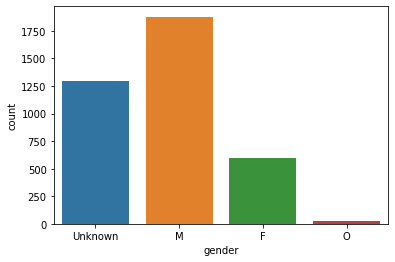

-----Gender Analysis of profile---


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


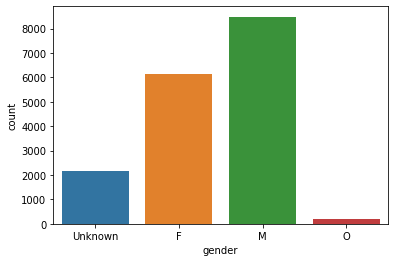

-----Year of joining analysis of people never completing offer and making transaction---


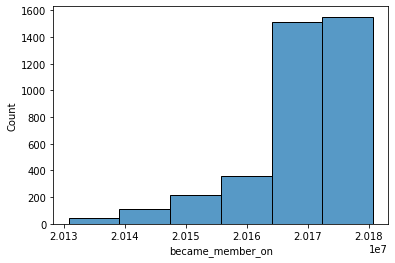

-----Year of joining analysis of profile


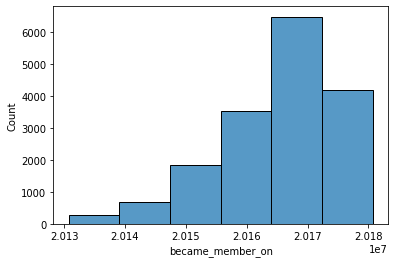

In [448]:
print("-----Gender Analysis of people never completing offer and making transaction---")
sns.countplot(offer_incompTrs['gender'])
plt.show()

print("-----Gender Analysis of profile---")
sns.countplot(profile['gender'])
plt.show()

print("-----Year of joining analysis of people never completing offer and making transaction---")
sns.histplot(offer_incompTrs['became_member_on'],bins=6)
plt.show()

print("-----Year of joining analysis of profile")
sns.histplot(profile['became_member_on'],bins=6)
plt.show()

In [78]:
offer_incompTrs[['amount','income','id','age']].describe()

,amount,income,id,age
count,3798.000000,2501.000000,3798.000000,3798.000000
mean,20.005982,52685.725710,12.749342,73.103212
std,36.019100,15772.215829,4.266762,35.676647
min,0.050000,30000.000000,3.000000,18.000000
25%,7.810000,40000.000000,10.000000,43.000000
50%,13.245000,51000.000000,12.000000,64.000000
75%,21.257500,63000.000000,15.000000,118.000000
max,1016.930000,119000.000000,35.000000,118.000000


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


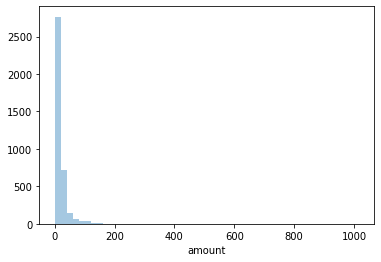

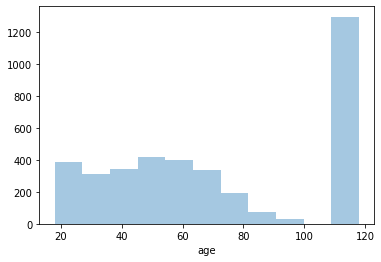

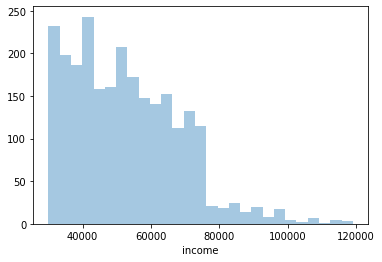

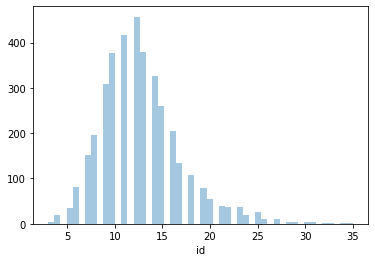

In [88]:
for i in ['amount','age','income','id']:
    sns.distplot(offer_incompTrs[i],kde=False)
    plt.show()

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


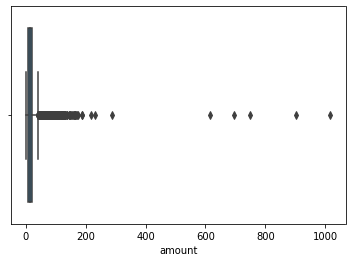

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


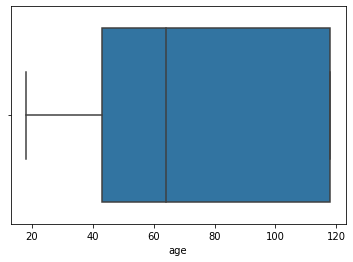

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


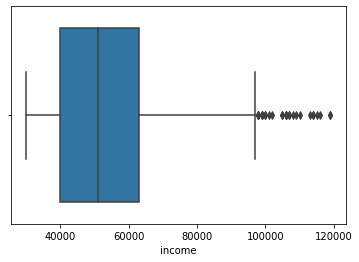

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


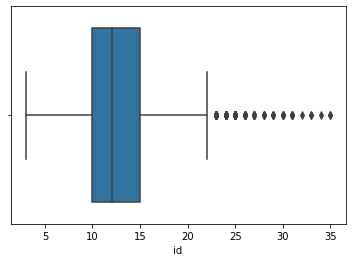

In [90]:
for i in ['amount','age','income','id']:
    sns.boxplot(offer_incompTrs[i])
    plt.show()


In [98]:
offer_incompTrs[offer_incompTrs['amount']>300]

,amount,gender,became_member_on,income,id,age
id,,,,,,
174fee0b94e54cc3b1904965d2fb1209,615.86,M,20171213,84000.0,12,61
72238c93bdfb4272a1f104a59ccc3a37,748.69,F,20171127,108000.0,10,63
73adeca7df934d9a888ddfcdaad2dff0,693.80,M,20180309,71000.0,6,59
7a153a17d9754d3686c37684146fb681,902.94,F,20180623,106000.0,10,64
f4e2258e9c23436e8db7dea8a2e12ec5,1016.93,F,20170816,81000.0,13,55


### list of customers never completed an offer and never made a transaction

In [228]:
ids1 = df[df['event']=="offer completed"]['id']

ids2 = df[df['event']=='transaction']['id']

offer_incompNoTrs = df[df['id'].isin(df[(df['event']=="offer received") & (~df['id'].isin(ids2)) &(~df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]


offer_incompNoTrs = offer_incompNoTrs[['id','amount','gender','age','became_member_on','income']]
offer_incompNoTrs = offer_incompNoTrs.groupby('id').agg({'gender':'first','became_member_on':'first','income':'first','age':'first'})
offer_incompNoTrs

,gender,became_member_on,income,age
id,,,,
01d7da27b8934ba1b3602a0153e4415f,F,20180312,76000.0,44
031387fa9cfd47e88f4e4b4b4cb71925,M,20170922,83000.0,41
043b6b6be98c412d901f7f376e0548d0,M,20171005,77000.0,73
044a7e5bbe7f4c66a898ad1dc4bc0049,M,20180422,52000.0,65
04837bcb97e241769a747cd71c50fe2f,M,20180227,45000.0,71
...,...,...,...,...
ff8bb9517a1e4ef18b63eb9f2ba67d9e,F,20180118,85000.0,54
ff8bee9ba3754ac687d9af685b2981b7,M,20180531,72000.0,64
ffc6c9fbe34b4578911dcdf6745b4c74,F,20180410,57000.0,62


-----Gender Analysis---


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


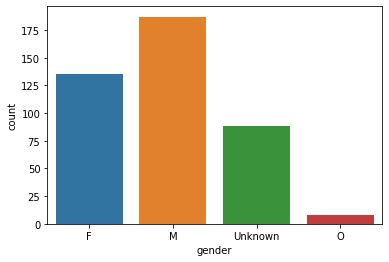

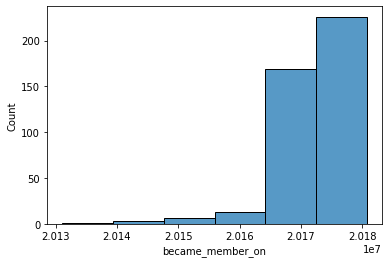

In [210]:
print("-----Gender Analysis---")
sns.countplot(offer_incompNoTrs['gender'])
plt.show()
sns.histplot(offer_incompNoTrs['became_member_on'],bins=6)
plt.show()


In [230]:
offer_incompNoTrs[['income','age']].describe()

,income,age
count,330.000000,418.000000
mean,73624.242424,70.858852
std,19913.445387,27.579868
min,31000.000000,18.000000
25%,59000.000000,51.000000
50%,73000.000000,63.000000
75%,89000.000000,82.750000
max,119000.000000,118.000000


C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


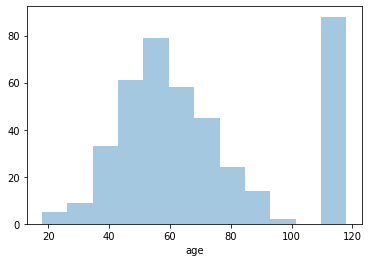

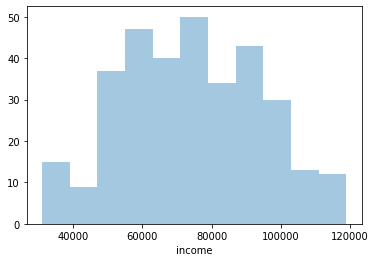

In [232]:
for i in ['age','income']:
    sns.distplot(offer_incompNoTrs[i],kde=False)
    plt.show()

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


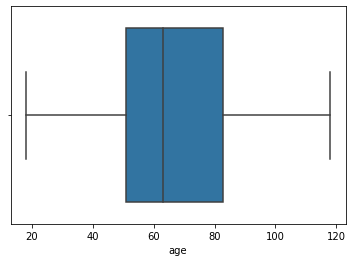

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


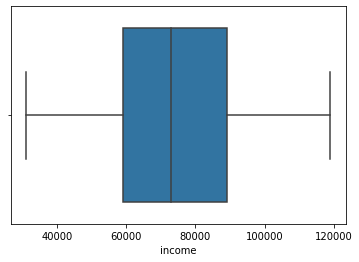

In [233]:
for i in ['age','income']:
    sns.boxplot(offer_incompNoTrs[i])
    plt.show()


### Classification
#### Will the customer make use of offer or not, with this analysis starbucks doesn't have to send offers to the customers who won't use it for sure
##### not considering the informational offers as their completion status is not known

In [364]:
##yes-those id's which have both offer received and offer completed
##no- those id's which should have offer received but never have offer completed

In [365]:
ids1 = df[df['event']=="offer completed"]['id']


status_yes = df[df['id'].isin(df[(df['event']=="offer received") & (df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]

status_no = df[df['id'].isin(df[(df['event']=="offer received") & (~df['id'].isin(ids1))].drop_duplicates(subset=['id'],keep="last")['id'].tolist())]

status_no =status_no[status_no['offer_type']!="informational"]

# # offer_incompTrs

# offer_incompTrs = offer_incompTrs[['id','amount','gender','age','became_member_on','income']]
# offer_incompTrs = offer_incompTrs.groupby('id').agg({'amount': 'sum','gender':'first','became_member_on':'first','income':'first','id':'count','age':'first'})
# offer_incompTrs

In [366]:
len(status_yes['id'].unique())

12774

In [367]:
len(status_no['id'].unique())

4216

In [ ]:
# checking if there's any mistake in the status separated dataframes
for i in tqdm(list(status_no['id'].unique())):
    if i in list(status_yes['id'].unique()):
        print(i)

In [368]:
len(np.append(status_yes['id'].unique(),status_no['id'].unique()))

16990

In [369]:
ids10= ~profile['id'].isin(np.append(status_yes['id'].unique(),status_no['id'].unique()))

vals = [i for i,j in ids10.items() if j==True]
print(vals)
#out of these remainging 10, 6 are id's of people who never received an offer but made a transaction and 4 are id's of people who didn't get any of bogo or discount offers, these won't be used for the analysis

[872, 5425, 5639, 6789, 11367, 12124, 13853, 14607, 14763, 15391]


In [370]:
data = df

data.loc[data['id'].isin(list(status_yes['id'].unique())), 'completion'] = 'yes'

data.loc[data['id'].isin(list(status_no['id'].unique())), 'completion'] = 'no'



data = data[['id','amount','gender','age','became_member_on','income','completion']]
data = data.groupby('id').agg({'completion':'first','amount': 'sum','gender':'first','became_member_on':'first','income':'first','age':'first'})

data

,completion,amount,gender,became_member_on,income,age
id,,,,,,
0009655768c64bdeb2e877511632db8f,yes,127.60,M,20170421,72000.0,33
00116118485d4dfda04fdbaba9a87b5c,no,4.09,Unknown,20180425,NaN,118
0011e0d4e6b944f998e987f904e8c1e5,yes,79.46,O,20180109,57000.0,40
0020c2b971eb4e9188eac86d93036a77,yes,196.86,F,20160304,90000.0,59
0020ccbbb6d84e358d3414a3ff76cffd,yes,154.05,F,20161111,60000.0,24
...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,yes,580.98,F,20150920,83000.0,69
fff7576017104bcc8677a8d63322b5e1,yes,29.94,M,20171031,73000.0,71
fff8957ea8b240a6b5e634b6ee8eafcf,no,12.15,M,20180218,56000.0,71


In [371]:
data['completion'].value_counts()

yes    12774
no      4216
Name: completion, dtype: int64

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='completion', ylabel='count'>

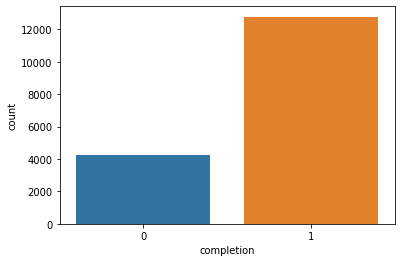

In [451]:
sns.countplot(data['completion'])

#### EDA on this dataset

-----Gender Analysis---


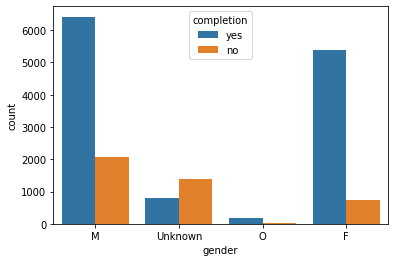

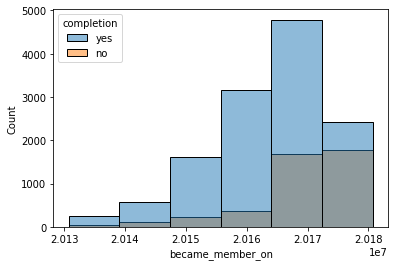

In [372]:
print("-----Gender Analysis---")
sns.countplot(x="gender",hue="completion",data=data)
plt.show()
sns.histplot(bins=6,data=data,x='became_member_on',hue='completion')
plt.show()


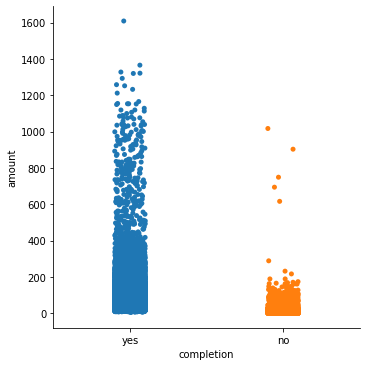

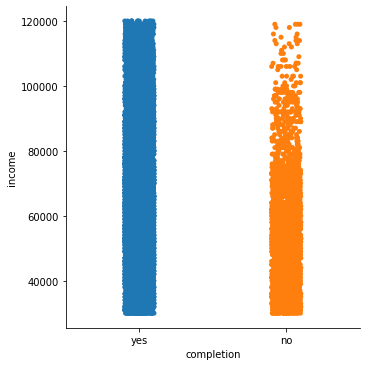

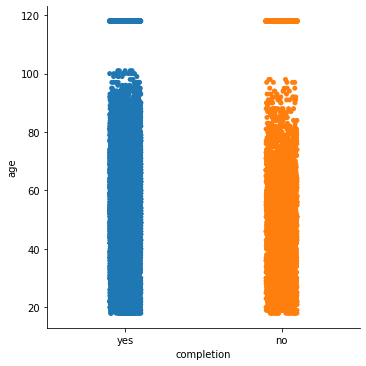

In [373]:
for i in ['amount','income','age']:
    sns.catplot(x='completion',y=i,data=data)
    plt.show()

#### Data Cleaning

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16990 entries, 0009655768c64bdeb2e877511632db8f to ffff82501cea40309d5fdd7edcca4a07
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion        16990 non-null  object 
 1   amount            16990 non-null  float64
 2   gender            16990 non-null  object 
 3   became_member_on  16990 non-null  int64  
 4   income            14817 non-null  float64
 5   age               16990 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [375]:
data[data['income'].isnull()]['completion'].value_counts()

no     1385
yes     788
Name: completion, dtype: int64

In [376]:
## filling the null values with mean using groupby
# data['income'].fillna(data.dropna(subset=['income']).groupby(['completion'])['income'].mean())

data['income'] = data.groupby(['completion'])['income'].transform(lambda x: x.fillna(x.mean()))  

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16990 entries, 0009655768c64bdeb2e877511632db8f to ffff82501cea40309d5fdd7edcca4a07
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion        16990 non-null  object 
 1   amount            16990 non-null  float64
 2   gender            16990 non-null  object 
 3   became_member_on  16990 non-null  int64  
 4   income            16990 non-null  float64
 5   age               16990 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [378]:
data.reset_index(drop=True,inplace=True)

In [379]:
# Remapping column values to numbers

data['gender'] = data['gender'].map({'M': 0, 'F': 1,'O':2,'Unknown':3})

data['completion'] = data['completion'].map({'yes':1,'no':0})

In [434]:
X = np.array(data.loc[:, data.columns != 'completion'])
y = np.array(data.loc[:, data.columns == 'completion'])

In [435]:
#### Using standard scaler to transform data into a standardized format
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [436]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2, shuffle = True, stratify = y)

#### Balancing the dataset with smote

In [437]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [438]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
# observe that data has been balanced
pd.Series(y_train_new).value_counts()

1    8942
0    8942
dtype: int64

C:\Users\M1060930\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

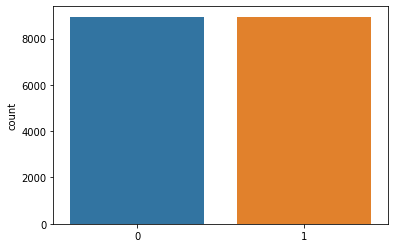

In [453]:
sns.countplot(y_train_new)

In [439]:
# using the logistic regression model over here
# fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred = clf.predict(X_train_new)

# prediction for Testing data
test_pred = clf.predict(X_test)

In [440]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.8597629165734735
Accuracy score for Testing Dataset =  0.8304885226603884


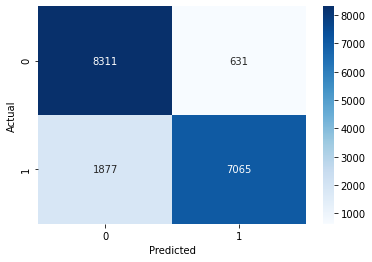

In [441]:
# Create confusion matrix for training data
from sklearn.metrics import confusion_matrix,classification_report  

cm = confusion_matrix(y_train_new, train_pred)  
  
# Plot confusion matrix  
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()  

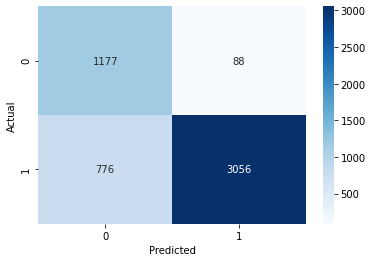

In [442]:
  
# Create confusion matrix for test dataset
cm = confusion_matrix(y_test, test_pred)  
  
# Plot confusion matrix  
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()  


In [443]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73      1265
           1       0.97      0.80      0.88      3832

    accuracy                           0.83      5097
   macro avg       0.79      0.86      0.80      5097
weighted avg       0.88      0.83      0.84      5097

